In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV,train_test_split
import math
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import roc_auc_score, roc_curve
import data_preprocess as pp
from keras.optimizers import Adam
import data_preprocess as pp

In [5]:
output_dim_const = 0
input_dim_const = 0 
epoch_const = 20
batch_size_const = 10000
learn_rate_const = 0.1
dropout_const = 0

In [23]:
df_train_x = pp.loadData('X_train.csv')
y_train = np.ravel(pp.loadData('Y_train.csv'))
df_test = pp.loadData('X_test.csv')

print("Sampling the data for NN")

X_train, X_test, Y_train, Y_test = train_test_split(df_train_x, y_train, test_size = 0.8)


Sampling the data for NN


In [30]:
print("Finding number of neurons for NN")
global_var = globals()

output_dim = find_best_output_size(df_train_x, y_train)

global_var['input_dim_const'] = df_train_x.shape[1]
global_var['output_dim_const'] = output_dim


Finding number of neurons for NN
Epoch 1/20
7/7 [==============================] - 5s 501ms/step - loss: 0.7174 - accuracy: 0.7020
Epoch 2/20
7/7 [==============================] - 5s 713ms/step - loss: 0.2092 - accuracy: 0.9605
Epoch 3/20
7/7 [==============================] - 3s 473ms/step - loss: 0.2973 - accuracy: 0.9552
Epoch 4/20
7/7 [==============================] - 4s 617ms/step - loss: 0.2548 - accuracy: 0.9612
Epoch 5/20
7/7 [==============================] - 5s 786ms/step - loss: 0.1826 - accuracy: 0.9609
Epoch 6/20
7/7 [==============================] - 5s 690ms/step - loss: 0.1602 - accuracy: 0.9611
Epoch 7/20
7/7 [==============================] - 4s 634ms/step - loss: 0.1477 - accuracy: 0.9607
Epoch 8/20
7/7 [==============================] - 4s 560ms/step - loss: 0.1453 - accuracy: 0.9600
Epoch 9/20
7/7 [==============================] - 5s 685ms/step - loss: 0.1391 - accuracy: 0.9611
Epoch 10/20
7/7 [==============================] - 4s 591ms/step - loss: 0.1343 - acc

7/7 [==============================] - 3s 448ms/step - loss: 0.2263 - accuracy: 0.9578
Epoch 4/20
7/7 [==============================] - 3s 448ms/step - loss: 0.2733 - accuracy: 0.9604
Epoch 5/20
7/7 [==============================] - 4s 503ms/step - loss: 0.1908 - accuracy: 0.9612
Epoch 6/20
7/7 [==============================] - 3s 437ms/step - loss: 0.1591 - accuracy: 0.9613
Epoch 7/20
7/7 [==============================] - 3s 435ms/step - loss: 0.1470 - accuracy: 0.9614
Epoch 8/20
7/7 [==============================] - 3s 437ms/step - loss: 0.1403 - accuracy: 0.9615
Epoch 9/20
7/7 [==============================] - 3s 422ms/step - loss: 0.1385 - accuracy: 0.9612
Epoch 10/20
7/7 [==============================] - 3s 438ms/step - loss: 0.1385 - accuracy: 0.9610
Epoch 11/20
7/7 [==============================] - 3s 426ms/step - loss: 0.1363 - accuracy: 0.9611
Epoch 12/20
7/7 [==============================] - 3s 431ms/step - loss: 0.1361 - accuracy: 0.9609
Epoch 13/20
7/7 [===========

7/7 [==============================] - 1s 180ms/step - loss: 0.1445 - accuracy: 0.9601
Epoch 7/20
7/7 [==============================] - 1s 152ms/step - loss: 0.1406 - accuracy: 0.9600
Epoch 8/20
7/7 [==============================] - 1s 121ms/step - loss: 0.1427 - accuracy: 0.9607
Epoch 9/20
7/7 [==============================] - 1s 126ms/step - loss: 0.1386 - accuracy: 0.9609
Epoch 10/20
7/7 [==============================] - 1s 123ms/step - loss: 0.1393 - accuracy: 0.9602
Epoch 11/20
7/7 [==============================] - 1s 123ms/step - loss: 0.1388 - accuracy: 0.9601
Epoch 12/20
7/7 [==============================] - 1s 125ms/step - loss: 0.1376 - accuracy: 0.9602
Epoch 13/20
7/7 [==============================] - 1s 123ms/step - loss: 0.1373 - accuracy: 0.9602
Epoch 14/20
7/7 [==============================] - 1s 122ms/step - loss: 0.1356 - accuracy: 0.9608
Epoch 15/20
7/7 [==============================] - 1s 130ms/step - loss: 0.1387 - accuracy: 0.9604
Epoch 16/20
7/7 [========

7/7 [==============================] - 1s 100ms/step - loss: 0.1405 - accuracy: 0.9589
Epoch 10/20
7/7 [==============================] - 1s 81ms/step - loss: 0.1409 - accuracy: 0.9589
Epoch 11/20
7/7 [==============================] - 0s 63ms/step - loss: 0.1383 - accuracy: 0.9597
Epoch 12/20
7/7 [==============================] - 0s 63ms/step - loss: 0.1392 - accuracy: 0.9593
Epoch 13/20
7/7 [==============================] - 0s 67ms/step - loss: 0.1398 - accuracy: 0.9591
Epoch 14/20
7/7 [==============================] - 0s 65ms/step - loss: 0.1381 - accuracy: 0.9594
Epoch 15/20
7/7 [==============================] - 0s 64ms/step - loss: 0.1387 - accuracy: 0.9591
Epoch 16/20
7/7 [==============================] - 1s 79ms/step - loss: 0.1351 - accuracy: 0.9602
Epoch 17/20
7/7 [==============================] - 1s 158ms/step - loss: 0.1327 - accuracy: 0.9606
Epoch 18/20
7/7 [==============================] - 2s 305ms/step - loss: 0.1342 - accuracy: 0.9602
Epoch 19/20
7/7 [============

7/7 [==============================] - 1s 67ms/step - loss: 0.1352 - accuracy: 0.9603
Epoch 13/20
7/7 [==============================] - 0s 55ms/step - loss: 0.1330 - accuracy: 0.9614
Epoch 14/20
7/7 [==============================] - 0s 51ms/step - loss: 0.1350 - accuracy: 0.9608
Epoch 15/20
7/7 [==============================] - 0s 49ms/step - loss: 0.1338 - accuracy: 0.9613
Epoch 16/20
7/7 [==============================] - 0s 59ms/step - loss: 0.1355 - accuracy: 0.9604
Epoch 17/20
7/7 [==============================] - 0s 65ms/step - loss: 0.1317 - accuracy: 0.9611
Epoch 18/20
7/7 [==============================] - 0s 66ms/step - loss: 0.1335 - accuracy: 0.9604
Epoch 19/20
7/7 [==============================] - 1s 73ms/step - loss: 0.1318 - accuracy: 0.9611
Epoch 20/20
7/7 [==============================] - 0s 72ms/step - loss: 0.1314 - accuracy: 0.9610
Epoch 1/20
7/7 [==============================] - 4s 72ms/step - loss: 0.3963 - accuracy: 0.8157
Epoch 2/20
7/7 [=================

7/7 [==============================] - 0s 31ms/step - loss: 0.1335 - accuracy: 0.9612
Epoch 17/20
7/7 [==============================] - 0s 31ms/step - loss: 0.1346 - accuracy: 0.9602
Epoch 18/20
7/7 [==============================] - 0s 29ms/step - loss: 0.1312 - accuracy: 0.9613
Epoch 19/20
7/7 [==============================] - 0s 28ms/step - loss: 0.1346 - accuracy: 0.9601
Epoch 20/20
7/7 [==============================] - 0s 33ms/step - loss: 0.1325 - accuracy: 0.9609
Epoch 1/20
7/7 [==============================] - 1s 30ms/step - loss: 0.4251 - accuracy: 0.7187
Epoch 2/20
7/7 [==============================] - 0s 28ms/step - loss: 0.1757 - accuracy: 0.9606
Epoch 3/20
7/7 [==============================] - 0s 30ms/step - loss: 0.1537 - accuracy: 0.9608
Epoch 4/20
7/7 [==============================] - 0s 31ms/step - loss: 0.1464 - accuracy: 0.9604
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.1413 - accuracy: 0.9608
Epoch 6/20
7/7 [=====================

7/7 [==============================] - 0s 37ms/step - loss: 0.1323 - accuracy: 0.9611
Epoch 20/20
7/7 [==============================] - 0s 34ms/step - loss: 0.1315 - accuracy: 0.9614
Epoch 1/20
7/7 [==============================] - 1s 27ms/step - loss: 0.3612 - accuracy: 0.9604
Epoch 2/20
7/7 [==============================] - 0s 24ms/step - loss: 0.1842 - accuracy: 0.9609
Epoch 3/20
7/7 [==============================] - 0s 29ms/step - loss: 0.1551 - accuracy: 0.9605
Epoch 4/20
7/7 [==============================] - 0s 25ms/step - loss: 0.1490 - accuracy: 0.9596
Epoch 5/20
7/7 [==============================] - 0s 27ms/step - loss: 0.1443 - accuracy: 0.9603
Epoch 6/20
7/7 [==============================] - 0s 23ms/step - loss: 0.1398 - accuracy: 0.9613
Epoch 7/20
7/7 [==============================] - 0s 30ms/step - loss: 0.1381 - accuracy: 0.9610
Epoch 8/20
7/7 [==============================] - 0s 30ms/step - loss: 0.1407 - accuracy: 0.9597
Epoch 9/20
7/7 [========================

7/7 [==============================] - 0s 27ms/step - loss: 0.1585 - accuracy: 0.9606
Epoch 4/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1470 - accuracy: 0.9611
Epoch 5/20
7/7 [==============================] - 0s 24ms/step - loss: 0.1422 - accuracy: 0.9616
Epoch 6/20
7/7 [==============================] - 0s 25ms/step - loss: 0.1396 - accuracy: 0.9611
Epoch 7/20
7/7 [==============================] - 0s 28ms/step - loss: 0.1381 - accuracy: 0.9614
Epoch 8/20
7/7 [==============================] - 0s 26ms/step - loss: 0.1372 - accuracy: 0.9615
Epoch 9/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1325 - accuracy: 0.9622
Epoch 10/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1339 - accuracy: 0.9621
Epoch 11/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1356 - accuracy: 0.9611
Epoch 12/20
7/7 [==============================] - 0s 33ms/step - loss: 0.1311 - accuracy: 0.9623
Epoch 13/20
7/7 [=====================

7/7 [==============================] - 0s 20ms/step - loss: 0.1426 - accuracy: 0.9603
Epoch 8/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1415 - accuracy: 0.9598
Epoch 9/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1392 - accuracy: 0.9605
Epoch 10/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1385 - accuracy: 0.9604
Epoch 11/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1395 - accuracy: 0.9597
Epoch 12/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1374 - accuracy: 0.9602
Epoch 13/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1360 - accuracy: 0.9609
Epoch 14/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1371 - accuracy: 0.9601
Epoch 15/20
7/7 [==============================] - 0s 21ms/step - loss: 0.1357 - accuracy: 0.9604
Epoch 16/20
7/7 [==============================] - 0s 20ms/step - loss: 0.1353 - accuracy: 0.9603
Epoch 17/20
7/7 [=================

7/7 [==============================] - 0s 18ms/step - loss: 0.1376 - accuracy: 0.9595
Epoch 12/20
7/7 [==============================] - 0s 20ms/step - loss: 0.1397 - accuracy: 0.9588
Epoch 13/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1380 - accuracy: 0.9600
Epoch 14/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1390 - accuracy: 0.9593
Epoch 15/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1379 - accuracy: 0.9595
Epoch 16/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1390 - accuracy: 0.9593
Epoch 17/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1378 - accuracy: 0.9593
Epoch 18/20
7/7 [==============================] - 0s 20ms/step - loss: 0.1364 - accuracy: 0.9594
Epoch 19/20
7/7 [==============================] - 0s 16ms/step - loss: 0.1339 - accuracy: 0.9602
Epoch 20/20
7/7 [==============================] - 0s 16ms/step - loss: 0.1336 - accuracy: 0.9599
Epoch 1/20
7/7 [================

7/7 [==============================] - 0s 16ms/step - loss: 0.1364 - accuracy: 0.9601
Epoch 16/20
7/7 [==============================] - 0s 14ms/step - loss: 0.1336 - accuracy: 0.9610
Epoch 17/20
7/7 [==============================] - 0s 14ms/step - loss: 0.1335 - accuracy: 0.9611
Epoch 18/20
7/7 [==============================] - 0s 16ms/step - loss: 0.1335 - accuracy: 0.9606
Epoch 19/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1318 - accuracy: 0.9608
Epoch 20/20
7/7 [==============================] - 0s 14ms/step - loss: 0.1338 - accuracy: 0.9601
Epoch 1/20
7/7 [==============================] - 1s 30ms/step - loss: 0.4530 - accuracy: 0.6713
Epoch 2/20
7/7 [==============================] - 0s 20ms/step - loss: 0.1945 - accuracy: 0.9595
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1643 - accuracy: 0.9590
Epoch 4/20
7/7 [==============================] - 0s 20ms/step - loss: 0.1571 - accuracy: 0.9596
Epoch 5/20
7/7 [====================

7/7 [==============================] - 0s 14ms/step - loss: 0.1329 - accuracy: 0.9609
Epoch 20/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1332 - accuracy: 0.9605
Epoch 1/20
7/7 [==============================] - 1s 18ms/step - loss: 0.4431 - accuracy: 0.7113
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1898 - accuracy: 0.9608
Epoch 3/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1597 - accuracy: 0.9603
Epoch 4/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1519 - accuracy: 0.9605
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1488 - accuracy: 0.9598
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1437 - accuracy: 0.9606
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.1415 - accuracy: 0.9610
Epoch 8/20
7/7 [==============================] - 0s 14ms/step - loss: 0.1413 - accuracy: 0.9602
Epoch 9/20
7/7 [========================

In [47]:
print("The best number of neurons for the output layer is ", output_dim_const)
print("gridsearch to find the best params")
best_params = tune(X_train,Y_train)

The best number of neurons for the output layer is  535
gridsearch to find the best params


In [36]:
print("Best params from gridsearch ", best_params)
print("Getting the final prediction")

Best params from gridsearch  {'dropout_rate': 0.1, 'lr': 0.1}
Getting the final prediction


0.001 0.0 535
Epoch 1/20
7/7 [==============================] - 3s 188ms/step - loss: 0.4648 - accuracy: 0.8019
Epoch 2/20
7/7 [==============================] - 2s 212ms/step - loss: 0.1927 - accuracy: 0.9605
Epoch 3/20
7/7 [==============================] - 1s 165ms/step - loss: 0.1680 - accuracy: 0.9605
Epoch 4/20
7/7 [==============================] - 1s 158ms/step - loss: 0.1598 - accuracy: 0.9605
Epoch 5/20
7/7 [==============================] - 1s 163ms/step - loss: 0.1525 - accuracy: 0.9601
Epoch 6/20
7/7 [==============================] - 1s 144ms/step - loss: 0.1467 - accuracy: 0.9606
Epoch 7/20
7/7 [==============================] - 2s 305ms/step - loss: 0.1449 - accuracy: 0.9609
Epoch 8/20
7/7 [==============================] - 3s 415ms/step - loss: 0.1454 - accuracy: 0.9605
Epoch 9/20
7/7 [==============================] - 2s 341ms/step - loss: 0.1402 - accuracy: 0.9612
Epoch 10/20
7/7 [==============================] - 2s 288ms/step - loss: 0.1422 - accuracy: 0.9607
Epoch

7/7 [==============================] - 1s 196ms/step - loss: 0.1181 - accuracy: 0.9629
Epoch 5/20
7/7 [==============================] - 1s 165ms/step - loss: 0.1176 - accuracy: 0.9629
Epoch 6/20
7/7 [==============================] - 1s 189ms/step - loss: 0.1177 - accuracy: 0.9630
Epoch 7/20
7/7 [==============================] - 1s 187ms/step - loss: 0.1166 - accuracy: 0.9633
Epoch 8/20
7/7 [==============================] - 2s 187ms/step - loss: 0.1167 - accuracy: 0.9631
Epoch 9/20
7/7 [==============================] - 1s 173ms/step - loss: 0.1177 - accuracy: 0.9633
Epoch 10/20
7/7 [==============================] - 1s 176ms/step - loss: 0.1165 - accuracy: 0.9635
Epoch 11/20
7/7 [==============================] - 1s 171ms/step - loss: 0.1154 - accuracy: 0.9636
Epoch 12/20
7/7 [==============================] - 1s 175ms/step - loss: 0.1146 - accuracy: 0.9639
Epoch 13/20
7/7 [==============================] - 1s 167ms/step - loss: 0.1144 - accuracy: 0.9639
Epoch 14/20
7/7 [==========

7/7 [==============================] - 1s 169ms/step - loss: 0.0984 - accuracy: 0.9687
Epoch 8/20
7/7 [==============================] - 1s 163ms/step - loss: 0.0984 - accuracy: 0.9686
Epoch 9/20
7/7 [==============================] - 2s 243ms/step - loss: 0.0994 - accuracy: 0.9689
Epoch 10/20
7/7 [==============================] - 5s 690ms/step - loss: 0.0979 - accuracy: 0.9687
Epoch 11/20
7/7 [==============================] - 2s 371ms/step - loss: 0.0973 - accuracy: 0.9688
Epoch 12/20
7/7 [==============================] - 1s 171ms/step - loss: 0.0965 - accuracy: 0.9694
Epoch 13/20
7/7 [==============================] - 2s 240ms/step - loss: 0.0960 - accuracy: 0.9691
Epoch 14/20
7/7 [==============================] - 1s 184ms/step - loss: 0.0956 - accuracy: 0.9693
Epoch 15/20
7/7 [==============================] - 2s 245ms/step - loss: 0.0961 - accuracy: 0.9692
Epoch 16/20
7/7 [==============================] - 2s 248ms/step - loss: 0.0962 - accuracy: 0.9693
Epoch 17/20
7/7 [=======

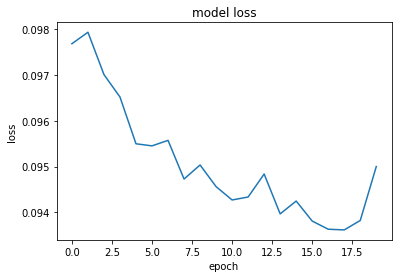

In [48]:
prediction = get_CV_prediction(df_train_x, y_train, best_params, df_test, output_dim_const)

In [38]:
def tune(x,y):
    dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6]
    learn_rate = [0.001,0.01,0.1] 
    model = KerasClassifier(build_fn=create_model,verbose=0,epochs=epoch_const, batch_size=batch_size_const)
    param_grid = dict( lr=learn_rate,dropout_rate=dropout_rate)
    grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
    return grid.fit(x, y).best_params_

In [46]:
def create_model(lr,dropout_rate):
    return build_model(input_dim_const,23,lr, dropout_rate)

In [9]:
def build_model(input_dim, output_dim,learn_rate=0.01,dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=input_dim, kernel_initializer='uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim,activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])   
    return model

In [29]:
def find_best_output_size(x_train, y_train):
   
    x_train = x_train.to_numpy()
    scores = [0] * 10
    alpha_list = [i+1 for i in range(10)]
    kfold = KFold(n_splits=5)
    for alpha in alpha_list:
        for train, test in kfold.split(x_train, y_train):
            output_dim = getNumberOfNeurons(x_train.shape[0], alpha,x_train.shape[1])
            
            model = build_model(x_train[train].shape[1], output_dim)
            model.fit(x_train[train], y_train[train], epochs=epoch_const, batch_size=batch_size_const,verbose=1)
        
            scores[alpha-1]+=roc_auc_score(y_train[test],model.predict(x_train[test])[:,0])
            
        scores[alpha-1] = scores[alpha-1]/5
        
    alpha = scores.index(min(scores)) +1
    var = globals()
    output_dim = getNumberOfNeurons(x_train.shape[0], alpha, x_train.shape[1])
    var["output_dim_const"] = output_dim
    return output_dim

In [44]:
def get_CV_prediction(x, y, best_params, test_data, output_dim):
    x = x.to_numpy()
    learn_rate = best_params['lr']
    dropout_const = best_params['dropout_rate']
    var = globals()
    var["learn_rate_const"] = learn_rate
    var["dropout_rate"] = dropout_const
    print(learn_rate, dropout_const,output_dim)
    model = build_model(x.shape[1], output_dim,learn_rate,dropout_const)
    prediction = [0] * test_data.shape[0]
    kfold = KFold(n_splits=10)
    
    for train, test in kfold.split(x, y):
        history = model.fit(x[train],y[train],epochs=epoch_const,batch_size=batch_size_const)
        prediction +=model.predict(test_data)[:,0]
        
    prediction = prediction/11
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    return prediction


In [12]:
def getNumberOfNeurons(observation_size,alpha, input_size ):
    return math.floor(observation_size/(alpha*(input_size+1)))